In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_bins(dnl):
    bins = [0]
    for d in dnl:
        last_edge = bins[-1]
        bins.append(last_edge + 1 + d)
    return np.array(bins)

In [3]:
counts = np.concatenate(([0.8, 1.1, 1.1]*333, [1]))
filtered = np.concatenate(([0.9, 1.05, 1.05]*333, [1]))
dnl = counts / filtered - 1
dnlBins = make_bins(dnl)
idealBinMids = np.arange(1000) + 0.5
dnlBinMids = (dnlBins[1:] + dnlBins[:-1]) / 2
inl = idealBinMids - dnlBinMids
binNumber = np.arange(1000)

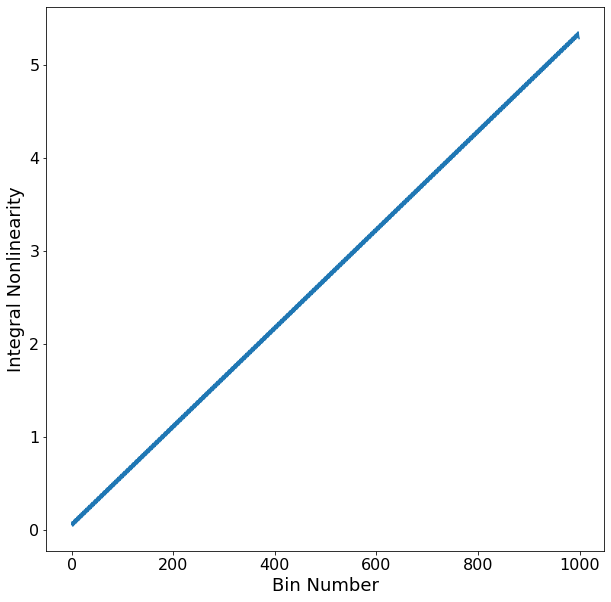

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(binNumber, inl)
ax.set_ylabel("Integral Nonlinearity", fontsize=18)
ax.set_xlabel("Bin Number", fontsize=18)
ax.tick_params(labelsize=16)
plt.show()

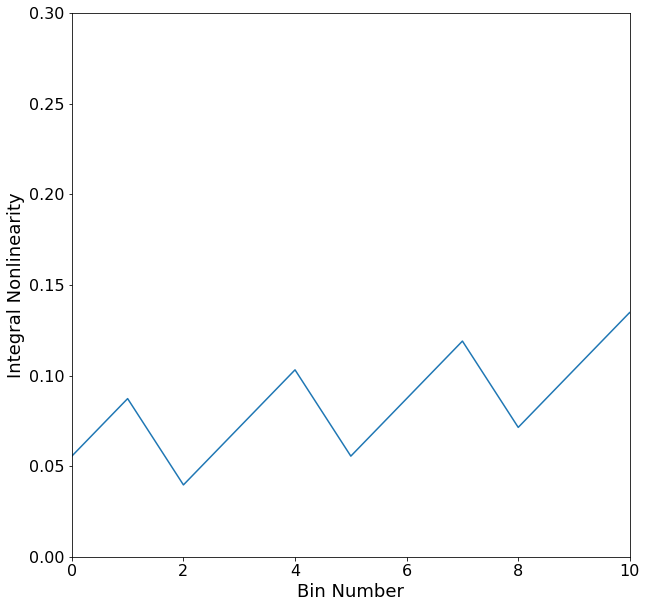

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(binNumber, inl)
ax.set_ylabel("Integral Nonlinearity", fontsize=18)
ax.set_xlabel("Bin Number", fontsize=18)
ax.set_xlim((0, 10))
ax.set_ylim((0, 0.3))
ax.tick_params(labelsize=16)
plt.show()